# Assignment 6

## Implement a function that takes the following inputs, and finds the minimum using gradient descent
- Function definition (one variable)
- Derivative (also a function definition)
- Starting point
- Learning rate

### For One variable

In [15]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

We define a function with one variable and it's derivative. 

In [16]:
def func(x):
    return x**6 - 3*x**4 + 5*x -1 
def deriv(x):
    return 6*x**5 -12*x**3 + 5

Now, we plot the function and define a function calles `onevariable` which for each frame in the animation, plots the gradient descent. As we have predefined the start and know the range in which the minima lies, it's possible to use gradient descent.

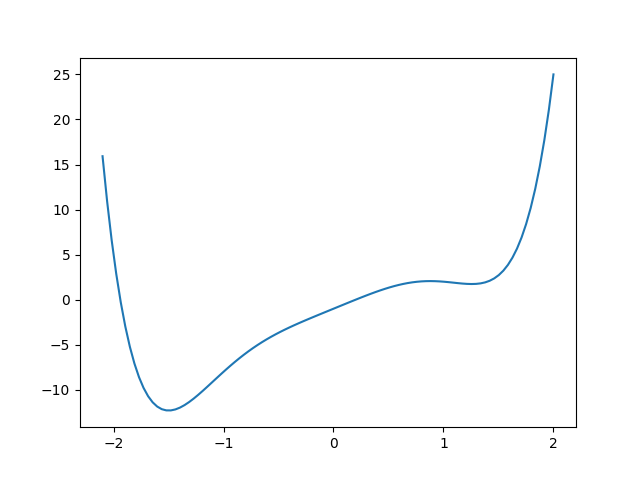

In [17]:
bestcost = 100000
fig, ax = plt.subplots()
xbase = np.linspace(-2.1, 2, 100)
ybase = func(xbase)
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)


start=-2
lr=0.01

def onevariable(frame):
    global bestcost, start, lr
    x = start - deriv(start) * lr 
    start = x
    y = func(x)
    lngood.set_data(x, y)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
ani= FuncAnimation(fig, onevariable, frames=range(10), interval=1000, repeat=False)
plt.show()    

The same thing can be better plotted without using funcAnimation. By just plotting the path followed.

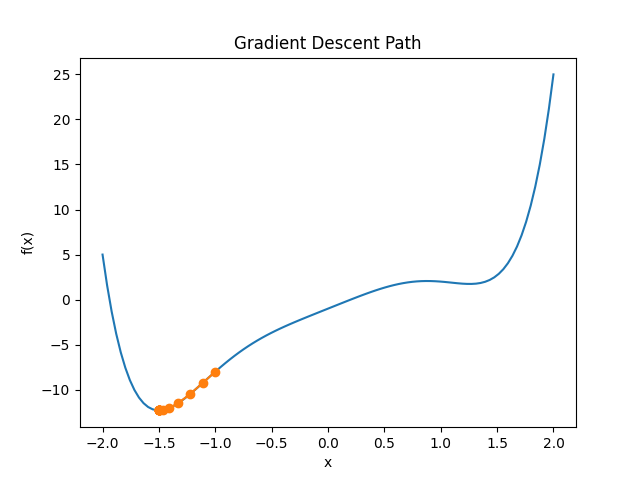

The minima of the given function is -12.296902591339006 at -1.4991164655889526


In [20]:
import matplotlib.pyplot as plt
start=-1
lr=0.01
fig, ax = plt.subplots()
xbase = np.linspace(-2, 2, 100)
ybase = func(xbase)
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
def gradient_descent_1d(func, deriv, start, lr):
    x = start
    grad = deriv(x)
    path_x = [x]
    path_y = [func(x)]
    while abs(grad) > 1e-5:
        x -= lr * grad
        grad = deriv(x)
        path_x.append(x)
        path_y.append(func(x))
    plt.plot(path_x, path_y, '-o')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Gradient Descent Path')
    plt.show()
    return x, func(x)
x,y=gradient_descent_1d(func, deriv, start, lr)
print("The minima of the given function is",y,"at",x)

### For two variable
For two variable we again define the funtion and derivative with respect to each variable.

In [21]:
def twovarfunc(x,y):
    return x**2 + y**2 
def dev_x(x,y):
    return 2*x 
def dev_y(x,y):
    return 2*y 

Similar to one varaible we try to plot the trail followed by the gradient descent as we know the range in which the minima lies in and where to start from.

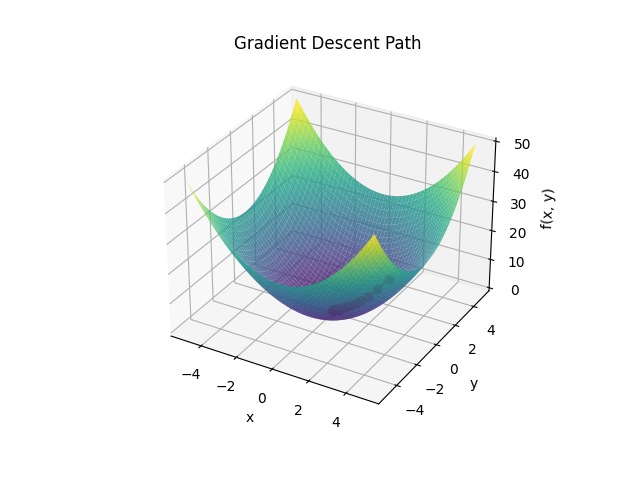

The minima of the given funtion is 2.083754510274958e-25 and it occurs at (3.2278123476086387e-13, 3.2278123476086387e-13)


In [22]:
bestcost = 100000
startx,starty=2.0,2.0
lr=0.1
import numpy as np
import matplotlib.pyplot as plt

def twovariable(f, df_dx, df_dy, startx,starty, lr):
    x, y = startx,starty
    grad_x = df_dx(x, y)
    grad_y = df_dy(x, y)
    path_x = [x]
    path_y = [y]
    while np.sqrt(grad_x**2 + grad_y**2) > 0.000000000001:
        x -= lr * grad_x
        y -= lr * grad_y
        grad_x = df_dx(x, y)
        grad_y = df_dy(x, y)
        path_x.append(x)
        path_y.append(y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x_range = np.linspace(-5,5)
    y_range = np.linspace(-5,5)
    X, Y = np.meshgrid(x_range, y_range)
    Z = f(X, Y)
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    ax.plot(path_x, path_y, f(np.array(path_x), np.array(path_y)), '-o', color='red')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    plt.title('Gradient Descent Path')
    plt.show()
    return (x, y), f(x, y)
point,minima=twovariable(twovarfunc, dev_x, dev_y, startx,starty, lr)
print("The minima of the given funtion is",minima,"and it occurs at",point )

### For multivariable

We do the same as two fariable and try to find a local minima point and its value.

In [23]:
def fivevarfunc(x1, x2, x3, x4, x5):
    return x1**2 + x2**2 + x3**2 + x4**2 + x5**2 +100

def dev_x1(x1, x2, x3, x4, x5):
    return 2*x1

def dev_x2(x1, x2, x3, x4, x5):
    return 2*x2

def dev_x3(x1, x2, x3, x4, x5):
    return 2*x3

def dev_x4(x1, x2, x3, x4, x5):
    return 2*x4

def dev_x5(x1, x2, x3, x4, x5):
    return 2*x5

In [24]:
bestcost = 100000
startx1, startx2, startx3, startx4, startx5 = 2.0, 2.0, 2.0, 2.0, 2.0
lr = 0.1

import numpy as np
import matplotlib.pyplot as plt

def fivevariable(f, df_dx1, df_dx2, df_dx3, df_dx4, df_dx5, startx1, startx2, startx3, startx4, startx5, lr):
    x1, x2, x3, x4, x5 = startx1, startx2, startx3, startx4, startx5
    grad_x1, grad_x2, grad_x3, grad_x4, grad_x5 = df_dx1(x1, x2, x3, x4, x5), df_dx2(x1, x2, x3, x4, x5), df_dx3(x1, x2, x3, x4, x5), df_dx4(x1, x2, x3, x4, x5), df_dx5(x1, x2, x3, x4, x5)
    path_x1, path_x2, path_x3, path_x4, path_x5 = [x1], [x2], [x3], [x4], [x5]
    
    while np.sqrt(grad_x1**2 + grad_x2**2 + grad_x3**2 + grad_x4**2 + grad_x5**2) > 0.000000000001:
        x1 -= lr * grad_x1
        x2 -= lr * grad_x2
        x3 -= lr * grad_x3
        x4 -= lr * grad_x4
        x5 -= lr * grad_x5
        
        grad_x1, grad_x2, grad_x3, grad_x4, grad_x5 = df_dx1(x1, x2, x3, x4, x5), df_dx2(x1, x2, x3, x4, x5), df_dx3(x1, x2, x3, x4, x5), df_dx4(x1, x2, x3, x4, x5), df_dx5(x1, x2, x3, x4, x5)
        
        path_x1.append(x1)
        path_x2.append(x2)
        path_x3.append(x3)
        path_x4.append(x4)
        path_x5.append(x5)
        
    return (x1, x2, x3, x4, x5), f(x1, x2, x3, x4, x5)

point,minima=fivevariable(fivevarfunc, dev_x1, dev_x2,dev_x3, dev_x4, dev_x5, startx1, startx2, startx3, startx4, startx5, lr)
print("The minima of the given funtion is",minima,"and it occurs at",point )

The minima of the given funtion is 100.0 and it occurs at (2.0657999024695287e-13, 2.0657999024695287e-13, 2.0657999024695287e-13, 2.0657999024695287e-13, 2.0657999024695287e-13)
